<a href="https://colab.research.google.com/github/MArtistForLife/GooglePlayEDA/blob/main/GooglePlayEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import os
# to change to specific folder in google drive that is needed
os.chdir('/content/drive/My Drive/Colab Notebooks/EDA')

Mounted at /content/drive


In [2]:
play = pd.read_csv("googleplaystore.csv")
play[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Insights and observation
The dataset has missing values

In [3]:
play.shape

(10841, 13)

In [4]:
play.info()
## yikes...a lot of these are objects, and some of them sound like they should be numericals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
play.describe()
## remember: info() gives the details on the df values, describe() gives STATS

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
play.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


###Insights
#####We note that the data has several missing (NaN) values: 1474 in the Rating category, 1 each in the Type and Content Rating categories, 3 in the Current Version category, and 3 in the Android Version category. The question, then: Do we replace these out with different values OR do we simply drop the columns that contain NaN to avoid skewing the statistics of the dataframe's values?

## Data Cleaning

In [8]:
play["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [9]:
play["Reviews"].str.isnumeric().sum()
## one value here, then, is NOT numeric

10840

In [10]:
play[~play["Reviews"].str.isnumeric()]
## the ~ is Boolean inverse operator, SO the numeric values will come back as False
## and the non-numeric vslues as True

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
play["Reviews"] = play["Reviews"].str.split("M").str[0]
play["Reviews"]

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
10836,38
10837,4
10838,3
10839,114


In [12]:
play["Reviews"] = play["Reviews"].astype(float)
play["Reviews"]

,Reviews
0,159.0
1,967.0
2,87510.0
3,215644.0
4,967.0
...,...
10836,38.0
10837,4.0
10838,3.0
10839,114.0


###How to Convert Categorical to Numerical
#####1. Call the column and determine what exactly splits the number you want from another thing (i.e., a space, colon, letter).
#####2. If the number you want is in the first location, use index 0. If next location, index 1, and so on as needed.
#####3. If some numbers have decimals, use .astype(float); otherwise, use .astype(int).

In [13]:
## 19000K = 19M
play["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
play["Size"] = play["Size"].str.replace("M", "000")
## replace M with 000
play["Size"] = play["Size"].str.replace("k", " ")
## and k with spaces
play["Size"] = play["Size"].str.replace("+", "")
play["Size"] = play["Size"].str.replace(",", "")
## needed these two to account for 1,000+ and just make it 1000

play["Size"] = play["Size"].replace("Varies with device", np.nan)
play["Size"] = play["Size"].astype(float)

In [15]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [16]:
play["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [17]:
play["Installs"] = play["Installs"].str.replace("+", "")
play["Installs"] = play["Installs"].str.replace(",", "")
play["Installs"] = play["Installs"].replace("Free", np.nan)
play["Installs"] = play["Installs"].astype(float)

In [18]:
play["Installs"]

,Installs
0,10000.0
1,500000.0
2,5000000.0
3,50000000.0
4,100000.0
...,...
10836,5000.0
10837,100.0
10838,1000.0
10839,1000.0


In [19]:
play["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [20]:
play["Price"] = play["Price"].str.replace("$", "")
play["Price"] = play["Price"].replace("Everyone", np.nan)
play["Price"] = play["Price"].astype(float)

In [21]:
play["Price"][4360:4371]
## a lot of games are free, so there are a lot of 0.00
## this range helps us check with some of the paid apps, though :)

,Price
4360,0.00
4361,0.00
4362,399.99
4363,0.00
4364,0.00
4365,0.00
4366,0.00
4367,400.00
4368,0.00
4369,0.00


In [22]:
play["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [23]:
## to get rid of the row with a weird date
play["Last Updated"] = pd.to_datetime(play["Last Updated"], format = "%B %d, %Y", errors = "coerce")
play = play.dropna(subset = ["Last Updated"])

play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [24]:
play.info()
## yay!! we have datetime format now for Last Updated column

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.2+ MB


In [25]:
play.to_csv("GooglePlay_data_cleaned.csv")

In [27]:
## now we have a csv file in the Google Drive folder :D

## EDA


In [26]:
play[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [28]:
play[play.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,NaN,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,NaN,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,NaN,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37000.0,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,NaN,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145.0,1.4,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,4.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,60000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,12000.0,1000000.0,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up


In [30]:
play.shape
## this is what is left with the duplicates

(10840, 13)

## Observation
The dataset has duplicate records.

In [31]:
play = play.drop_duplicates(subset = ["App"], keep = "first")
## looks for duplicates in the App column
## keep = "first" means that it keeps the first occurrence of each duplicate
## and then gets rid of the rest

In [32]:
play.shape

(9659, 13)

## Explore Data

In [33]:
numericFeatures = [feature for feature in play.columns if play[feature].dtype in ["int64", "float64", "datetime64[ns]"]]
categoricalFeatures = [feature for feature in play.columns if play[feature].dtype == "object"]

## now, to print the columns:
print("We have {} numerical features: {}".format(len(numericFeatures), numericFeatures))
print("\nWe have {} categorical features: {}".format(len(categoricalFeatures), categoricalFeatures))

We have 6 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [34]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   float64       
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [35]:
for column in categoricalFeatures:
  print(play[column].value_counts(normalize = True)*100)
  ## counts the number of unique values in each column
  ## then, divides each count by total number of values in column
  ## so, we get a percentage distribution of each column's unique value
  ## multiplied by 100 to get percentages, of course
  print("------------------------")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FI

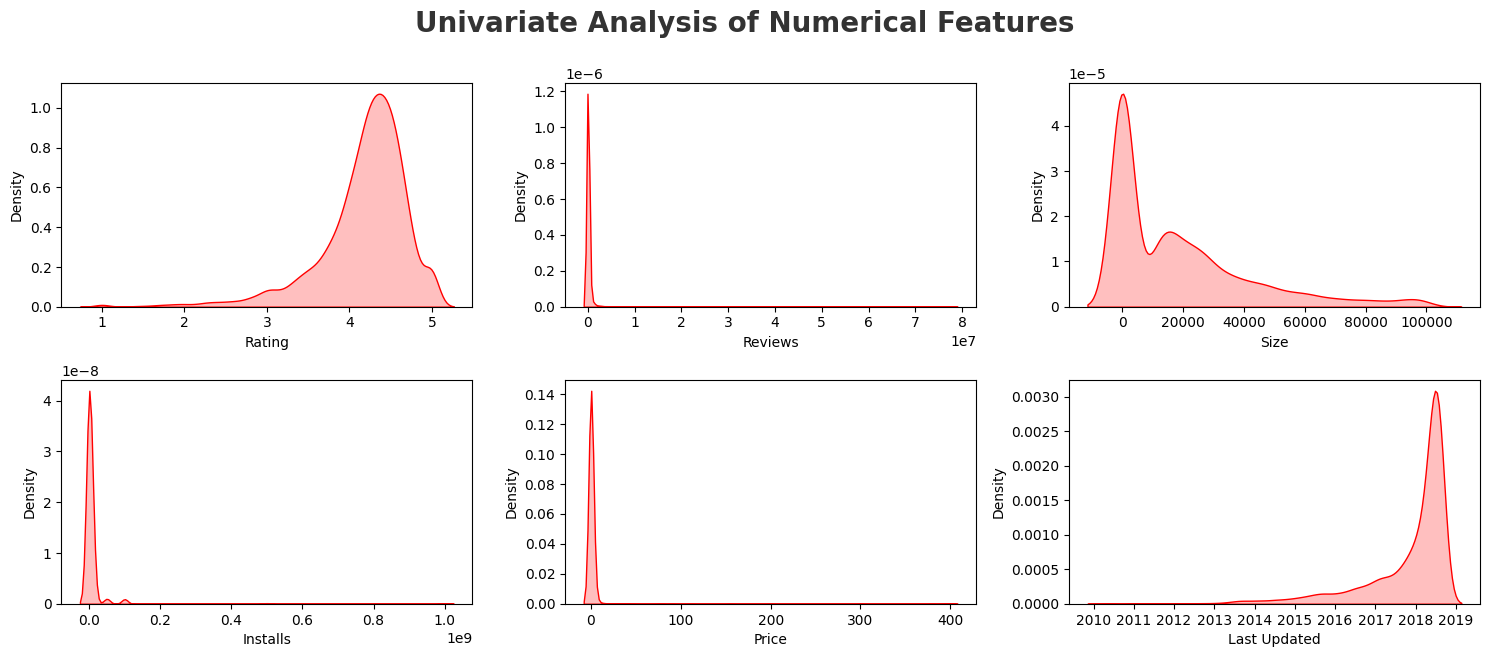

In [36]:
plt.figure(figsize = (15, 15))

plt.suptitle("Univariate Analysis of Numerical Features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1)
## alpha = 0.8 sets the transparency to 80% (lighter than fully opaque)
## y = 1 positions the title slightly above the top of the plot

for i in range(0, len(numericFeatures)):
  plt.subplot(5, 3, i+1)
  ## creates a subplot grid with 5 rows and 3 columns for each feature "i"

  sns.kdeplot(x = play[numericFeatures[i]], shade = True, color = "r")
  ## specifices data for the current feature, adding shaded region for
  ## better visualization, and making the curve color red

  plt.xlabel(numericFeatures[i])
  ## name the feature being plotted

  plt.tight_layout()
  ## gets spacing so plots don't overlap and everything's visible

## Observations
- Rating and Last Updated are left skewed.
- Reviews, Size, Installs, and Price are right skewed.

In [37]:
print(play[["Type", "Content Rating"]].info())
print(play[["Type", "Content Rating"]].head())

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            9658 non-null   object
 1   Content Rating  9659 non-null   object
dtypes: object(2)
memory usage: 226.4+ KB
None
   Type Content Rating
0  Free       Everyone
1  Free       Everyone
2  Free       Everyone
3  Free           Teen
4  Free       Everyone


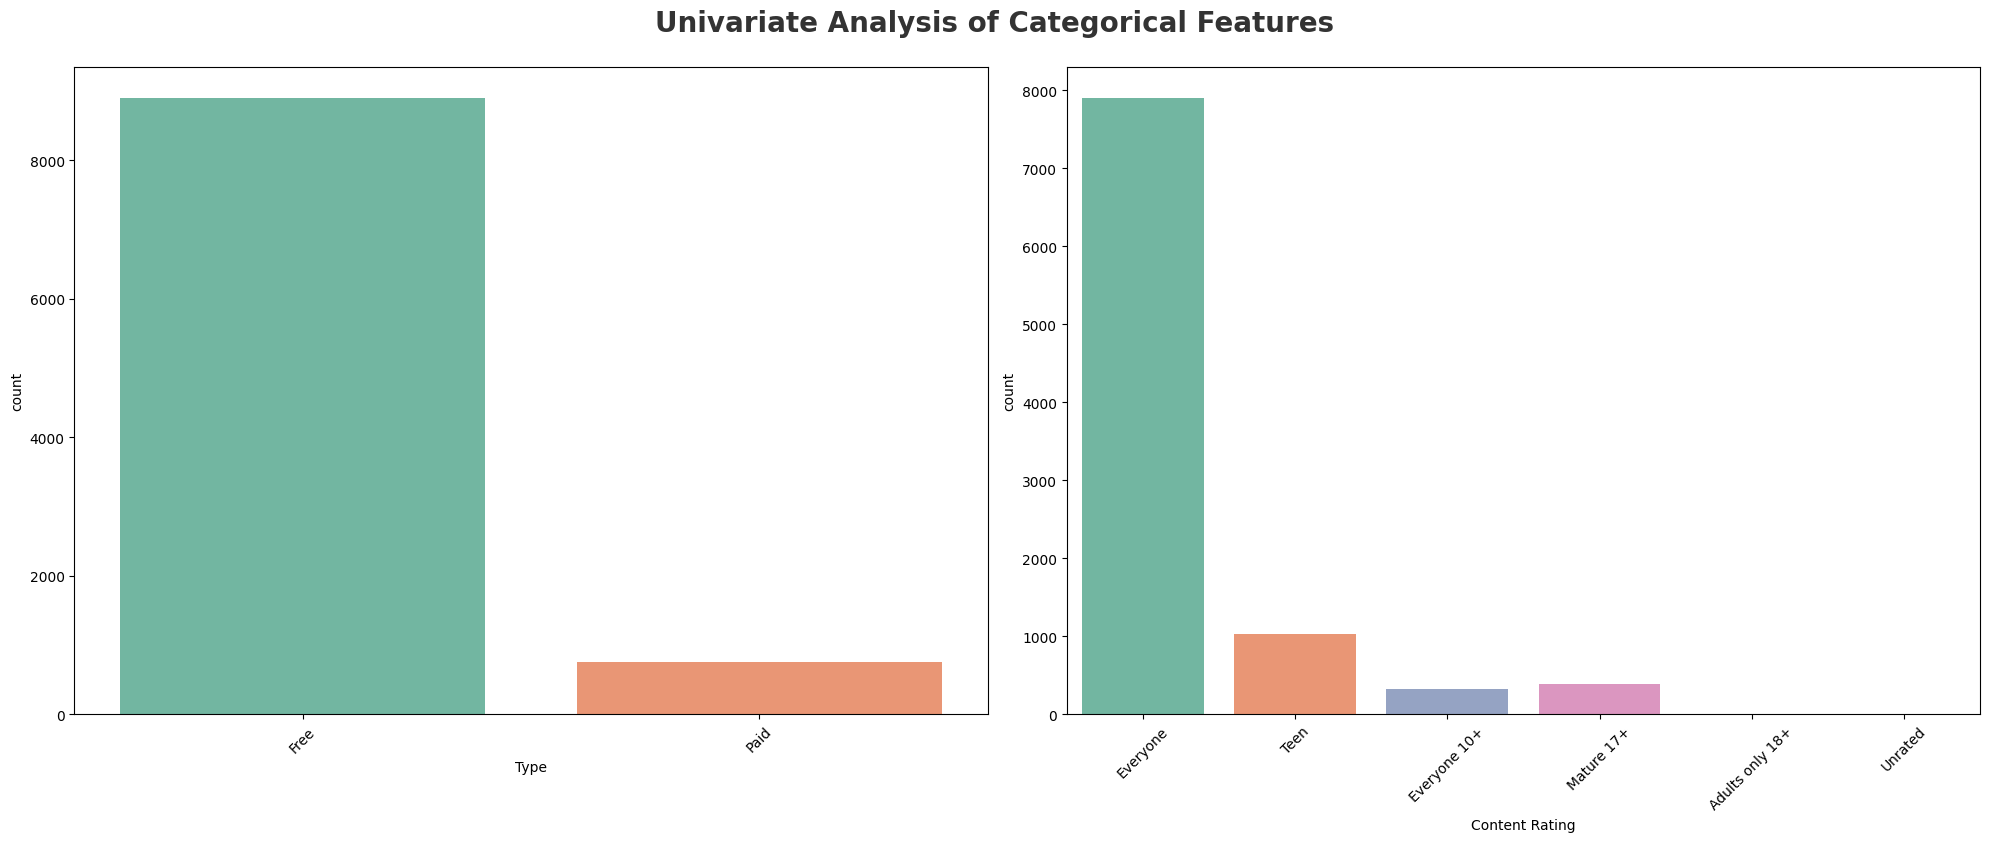

In [39]:
## now we need to see what is the proportion of count data on categorical columns
plt.figure(figsize = (20, 15))

plt.suptitle("Univariate Analysis of Categorical Features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1)
## alpha = 0.8 sets the transparency to 80% (lighter than fully opaque)
## y = 1 positions the title slightly above the top of the plot

category = ["Type", "Content Rating"]

for i in range(0, len(category)):
  plt.subplot(2, 2, i+1)
  ## creates a subplot grid with 2 rows and 2 columns for each feature "i"

  sns.countplot(x = play[category[i]], palette = "Set2")
  ## specifices data for the current feature, adding shaded region for
  ## better visualization, and making the curve color red
  ## also, yes: Set2 needs to be written exactly like that :)

  plt.xlabel(category[i])
  ## name the feature being plotted

  plt.xticks(rotation = 45)

  plt.tight_layout()
  ## gets spacing so plots don't overlap and everything's visible

In [40]:
## this gives us a nice look at the distribution of free vs. paid apps,
## and the distribution of apps for everyone vs. for teens, mature, adults, etc.

## Which is the most popular app category?

In [47]:
import plotly.express as px

In [52]:
play["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [70]:
## we need to do a pie chart for the categories

## first, accumulate all the data together
catCounts = play["Category"].value_counts()

categoryPie = px.pie(
    labels = catCounts.index, ## to get category names
    values = catCounts.values, ## to get each category's counts
    names = catCounts.index, ## to get each category's names labeled instead of numbers
    title = "Most Popular App Category"
)

categoryPie.update_traces(
    textposition = "outside", textinfo = "percent+label")
## textposition means where we put the values, so outside the pie chart
## textinfo tells us how to organize info outside chart, so with percent and label

## now, to adjust the size and not leave it to an autosize
categoryPie.update_layout(
    autosize = False,
    width = 900,
    height = 900,
    legend = dict( ## just a dictionary for key-value pairs
        x = 1.5, ## moves legend this much further to the right
        y = 0.5, ## centers the legend vertically
        title = "Categories", ## legend title
        font = dict(size = 12), ## legend font size
    )
)

categoryPie.show()

## Observations

1. There are several categories of apps in Google Play, but the biggest three are Family, Game, and Tools.
2. The smallest three categories are Beauty, Comics, and Parenting.

##Insights

1. The Family category reigns with 19%.
2. Meanwhile, the Beauty category takes up 0.549%.

## Internal Assignments
1. Which category has largest number of installations?
2. What are the top 5 most installed Apps in each popular category?
3. How many apps are there on Google Play Store which get 5 ratings??

In [78]:
play["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [79]:
play["Installs"].isna().sum()

0

In [89]:
## for largest number of installations, we need groupby
bigInstallsData = play.groupby("Category")["Installs"].sum().reset_index()
bigInstallsData = bigInstallsData.sort_values("Installs", ascending = False)
## first, we group data by category, then calculate sum of installs for each category
## reset_index() makes the grouped data turn back into a df that can be used on bar graph

installsBar = px.bar(
    bigInstallsData, ## the data accumulated that we wanna use
    x = "Category", ## each bar will be a category
    y = "Installs", ## height will be based on installs
    title = "Total Installs per Category",
    labels = {"Installs": "Total Installs", "Category": "App Category"}, ## respective labels for the axes
    color = "Category" ## color by category to distinguish each
)

installsBar.update_layout(
    xaxis_tickangle = 45,
    width = 1200,
    height = 800
)

installsBar.show()

### Which Category has largest number of installations?
- The Game category has the largest number of installations, at close to 14 billion.

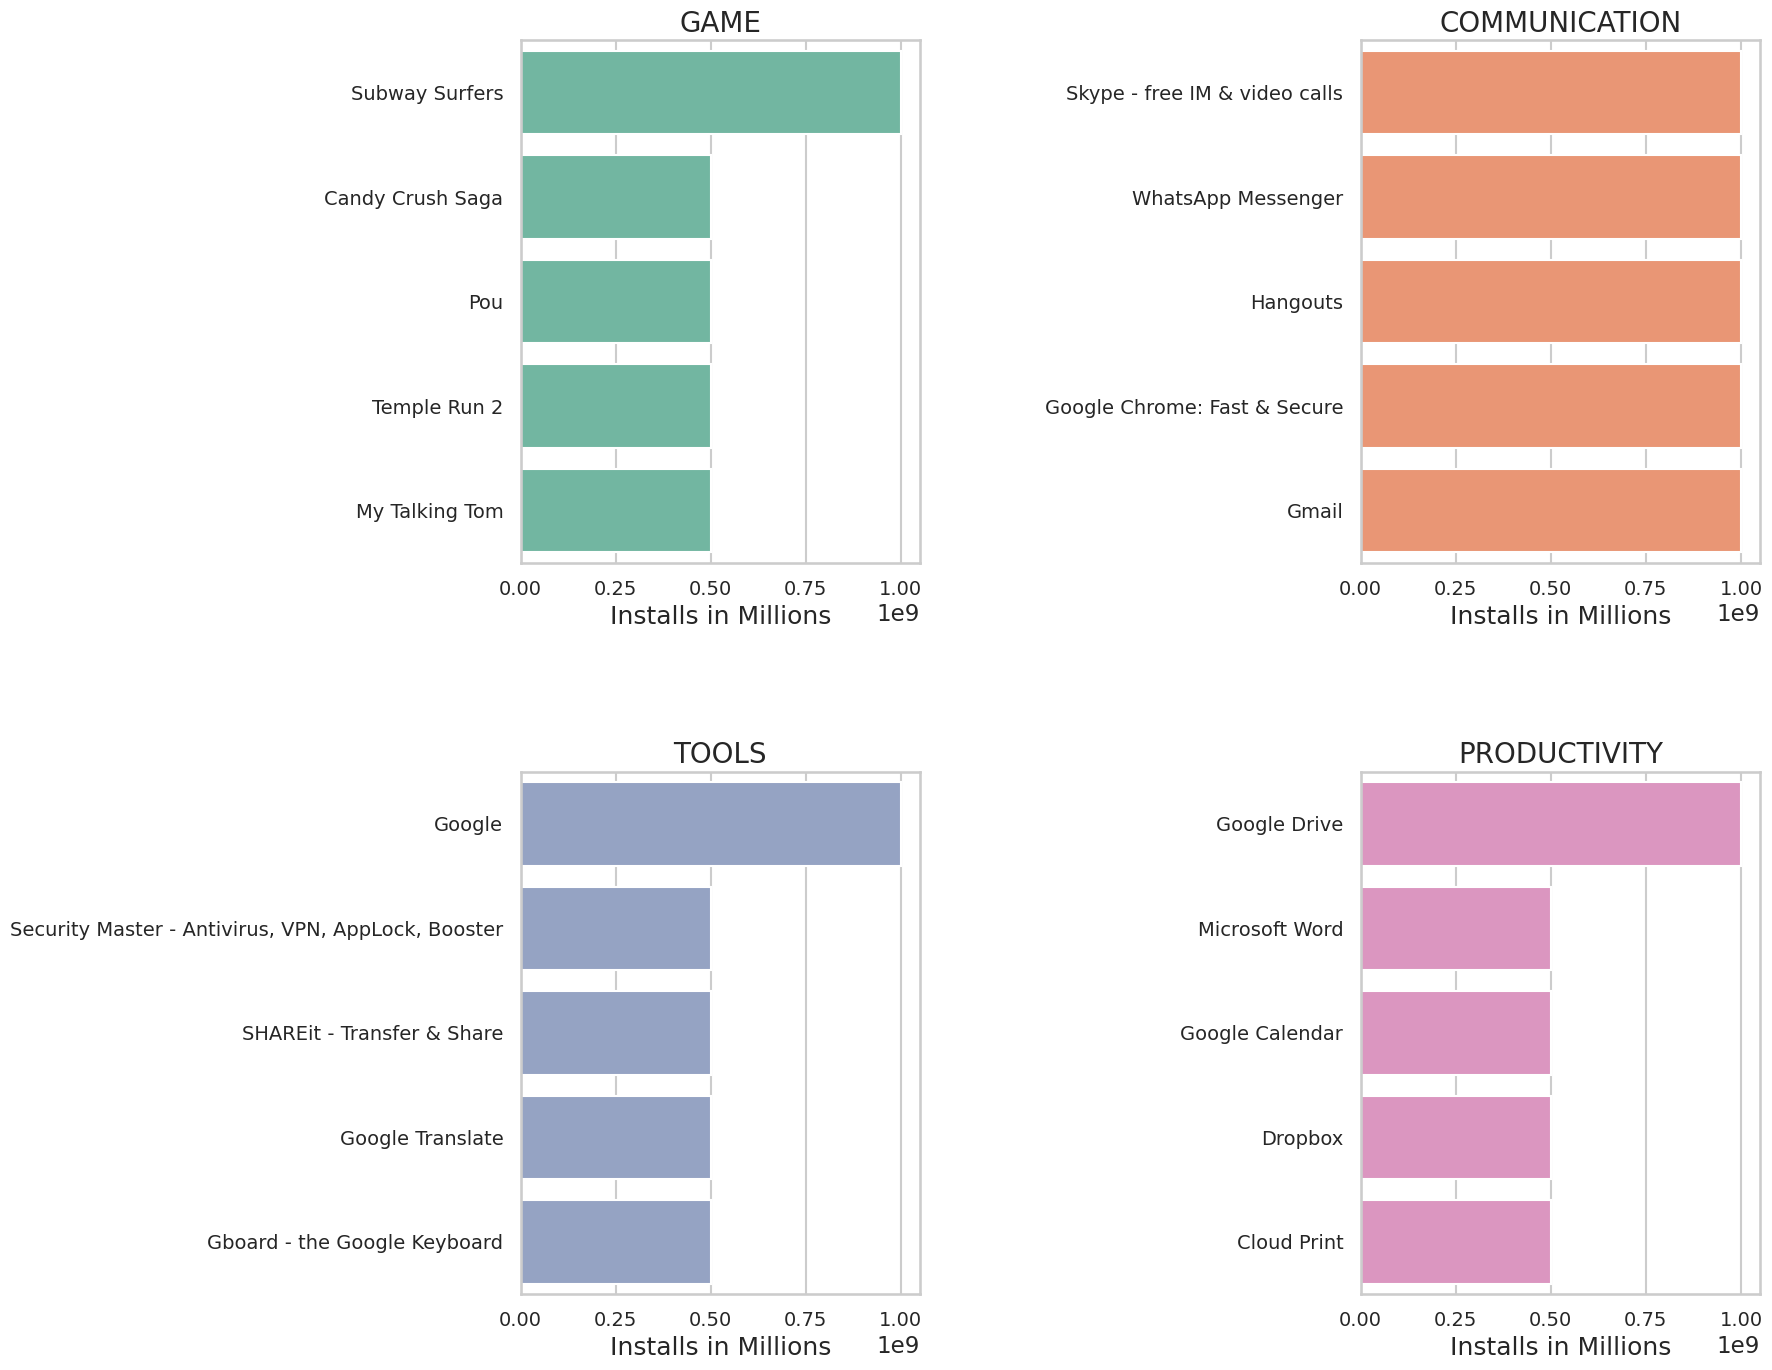

In [103]:
## for top 5 installed games per category, we need groupby again
appInstallsData = play.groupby(["Category", "App"])["Installs"].sum().reset_index()
appInstallsData = appInstallsData.sort_values("Installs", ascending = False)
## first, we group data by category and app, then calculate sum of installs for each category
## reset_index() makes the grouped data turn back into a df that can be used on bar graphs

## this narrows us down to only those 4 categories
apps = ["GAME", "COMMUNICATION", "TOOLS", "PRODUCTIVITY"]

## for plot design
sns.set_context("talk") ## better readibility
sns.set_style("whitegrid") ## clearer
plt.figure(figsize = (20, 16))

## color scheme for the bars
colors = sns.color_palette("Set2", len(apps))

for i, app in enumerate(apps): ## enumerate iterates over list but keeps track of
## current element's position
  zeData = appInstallsData[appInstallsData.Category == app]
  plt.subplot(2, 2, i+1) ## 2 rows and 2 columns
  sns.barplot(data = zeData[:5], x = "Installs", y = "App", palette = [colors[i]]) ## to plot top 5 apps
  plt.xlabel("Installs in Millions", fontsize = 18)
  plt.ylabel("", fontsize = 15)
  plt.title(app, size = 20)

  ## for axis ticks to be better spaced
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)

plt.tight_layout(pad = 5.0)
plt.subplots_adjust(hspace = 0.4)
plt.show()

## What are the top 5 most installed apps in the top 4 popular categories?
*   Game category
  *   **Subway Surfers**
  *   Candy Crush Saga
  *   Pou
  *   Temple Run 2
  *   My Talking Tom
*   Communication category
  *   **Skype - free IM & video calls**
  *   WhatsApp Messenger
  *   Hangouts
  *   Google Chrome: Fast & Secure
  *   Gmail
*   Tools category
  *   **Google**
  *   Security Master - Antivirus, VPN, AppLock, Booster
  *   SHAREit - Transfer & Share
  *   Google Translate
  *   Gboard - the Google Keyboard
*   Productivity category
  *   **Google Drive**
  *   Microsoft Word
  *   Google Calendar
  *   Dropbox
  *   Cloud Print

In [116]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   float64       
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


In [123]:
byRate = play.query("Rating == 5.0") ## this'll work better than using value_counts()
byRate = byRate.sort_values("Installs", ascending = False)
byRate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10.0,3.0,10000.0,Free,0.00,Everyone,Entertainment,2017-06-26,1.0.9,4.0 and up
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34.0,12000.0,5000.0,Free,0.00,Everyone,Comics,2018-07-31,1.0.5,5.0 and up
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24.0,3.2,5000.0,Free,0.00,Everyone,Tools,2018-06-13,1.1.3,4.3 and up
8058,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000.0,Free,0.00,Everyone,Lifestyle,2017-09-12,5.1.10,4.1 and up
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37000.0,1000.0,Free,0.00,Everyone,Comics,2018-06-26,2.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,CQ ESPM,BUSINESS,5.0,2.0,3.4,5.0,Free,0.00,Everyone,Business,2017-06-03,1.0.1,4.1 and up
7147,CB Heroes,SOCIAL,5.0,5.0,1.8,5.0,Free,0.00,Everyone,Social,2018-08-04,1.2.4,5.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1.0,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1.0,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up


In [124]:
## there being 271 rows where Rating = 5.0 means there are 271 apps with 5-star ratings

### How many apps are there on Google Play Store which get 5-star ratings??
- There are 271 apps on Google Play with a 5-star rating.
- The one with the most installs is a Family app called Ek Bander Ne Kholi Dukan.